# Skeleton of Assignment 4:
    test if the distribution of 
    
    1) trip duration of bikers that ride during the day vs night
    
    2) age of bikers for trips originating in Manhattan and in Brooklyn
    
    are different. Use 3 tests: KS, Pearson's, Spearman's. 
    
    Use the scipy.stats functions scipy.stats.ks_2samp, scipy.stats.pearsonr, scipy.stats.spearmanr. 
    
    For the KS do the test with the entire dataset and with a subset 200 times smaller
    
    Choose a single significant threshold for the whole exercise. 
    
    For each test phrase the Null Hypothesis in words.
    
    Describe the return of the scipy function you use in each case.
    
    State the result in terms of rejection of the Null.

In [1]:
import pylab as pl
import pandas as pd
import numpy as np
import scipy.stats
import os
import json
%pylab inline

def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("wget https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nyc_pluto_18v1.zip" + datestring + "-citibike-tripdata.zip")
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

Populating the interactive namespace from numpy and matplotlib


# Read in data

In [2]:
datestring = ['201601', '201607']
for date in datestring:
    getCitiBikeCSV(date)

file in place, you can continue
file in place, you can continue


In [3]:
df_201601 = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring[0] + '-citibike-tripdata.csv')
df_201601.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,923,1/1/2016 00:00:41,1/1/2016 00:16:04,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22285,Subscriber,1958.0,1
1,379,1/1/2016 00:00:45,1/1/2016 00:07:04,476,E 31 St & 3 Ave,40.743943,-73.979661,498,Broadway & W 32 St,40.748549,-73.988084,17827,Subscriber,1969.0,1
2,589,1/1/2016 00:00:48,1/1/2016 00:10:37,489,10 Ave & W 28 St,40.750664,-74.001768,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,21997,Subscriber,1982.0,2
3,889,1/1/2016 00:01:06,1/1/2016 00:15:56,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22794,Subscriber,1961.0,2
4,1480,1/1/2016 00:01:12,1/1/2016 00:25:52,2006,Central Park S & 6 Ave,40.765909,-73.976342,2006,Central Park S & 6 Ave,40.765909,-73.976342,14562,Subscriber,1952.0,1


In [4]:
df_201607 = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring[1] + '-citibike-tripdata.csv')
df_201607.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,704,7/1/2016 00:00:02,7/1/2016 00:11:47,459,W 20 St & 11 Ave,40.746745,-74.007756,347,Greenwich St & W Houston St,40.728846,-74.008591,17431,Customer,NaN,0
1,492,7/1/2016 00:00:18,7/1/2016 00:08:31,293,Lafayette St & E 8 St,40.730287,-73.990765,466,W 25 St & 6 Ave,40.743954,-73.991449,24159,Subscriber,1984.0,1
2,191,7/1/2016 00:00:19,7/1/2016 00:03:31,3090,N 8 St & Driggs Ave,40.717746,-73.956001,3107,Bedford Ave & Nassau Ave,40.723117,-73.952123,16345,Subscriber,1986.0,2
3,687,7/1/2016 00:00:24,7/1/2016 00:11:52,459,W 20 St & 11 Ave,40.746745,-74.007756,347,Greenwich St & W Houston St,40.728846,-74.008591,25210,Customer,NaN,0
4,609,7/1/2016 00:00:31,7/1/2016 00:10:40,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,212,W 16 St & The High Line,40.743349,-74.006818,15514,Customer,NaN,0


In [5]:
df = pd.concat([df_201601, df_201607])

In [6]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

In [7]:
df['date'] = pd.to_datetime(df['stoptime'], infer_datetime_format = True)

# SPLIT BY DAY AND NIGHT

$H_0$: There is no statistical difference in the trip duration distribution between day (6am to 6pm) and night (6pm to 6am), $ \alpha = 0.05 $.

In [8]:
dayriders= pd.DataFrame(df[['start station id', 'tripduration']][(df['date'].dt.hour >= 6) & (df['date'].dt.hour < 18)] )
nightriders = pd.DataFrame(df[['start station id', 'tripduration']][(df['date'].dt.hour < 6) | (df['date'].dt.hour >= 18)])

In [9]:
dayriders.tripduration.describe()

count    1.268759e+06
mean     9.321024e+02
std      1.035736e+04
min      6.100000e+01
25%      3.750000e+02
50%      6.120000e+02
75%      1.035000e+03
max      6.707533e+06
Name: tripduration, dtype: float64

Text(0,0.5,'Trip Duration in Seconds')

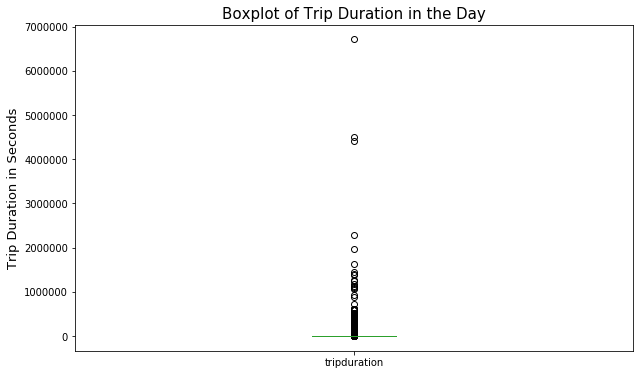

In [10]:
dayriders.plot(y = 'tripduration', kind = 'box', figsize = (10, 6))
plt.title("Boxplot of Trip Duration in the Day", fontsize = 15)
plt.ylabel('Trip Duration in Seconds', fontsize = 13)

**Figure 1**:
The boxplot above shows the range for trip duration in the day. Values above 10,800 seconds (3 hours) will be taken as outliers so we will only be using a range of 0 to 10,800 to plot our histogram later.

In [11]:
nightriders.tripduration.describe()

count    6.208290e+05
mean     1.014104e+03
std      1.565333e+04
min      6.100000e+01
25%      3.890000e+02
50%      6.530000e+02
75%      1.110000e+03
max      6.177145e+06
Name: tripduration, dtype: float64

Text(0,0.5,'Trip Duration in Seconds')

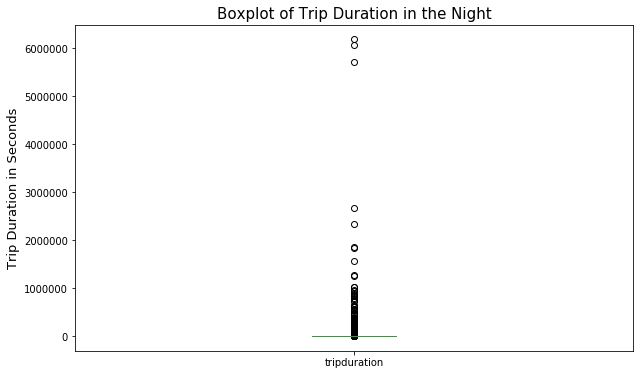

In [12]:
nightriders.plot(y = 'tripduration', kind = 'box', figsize = (10, 6))
plt.title("Boxplot of Trip Duration in the Night", fontsize = 15)
plt.ylabel('Trip Duration in Seconds', fontsize = 13)

**Figure 2**:
The boxplot above shows the range for trip duration in the night. Values above 10,800 seconds (3 hours) will be taken as outliers so we will only be using a range of 0 to 10,800 to plot our histogram later.

In [13]:
# dropping NaN values
dayriders.dropna(inplace= True)
nightriders.dropna(inplace= True)

Lets split trip duration in 2 minute bins.

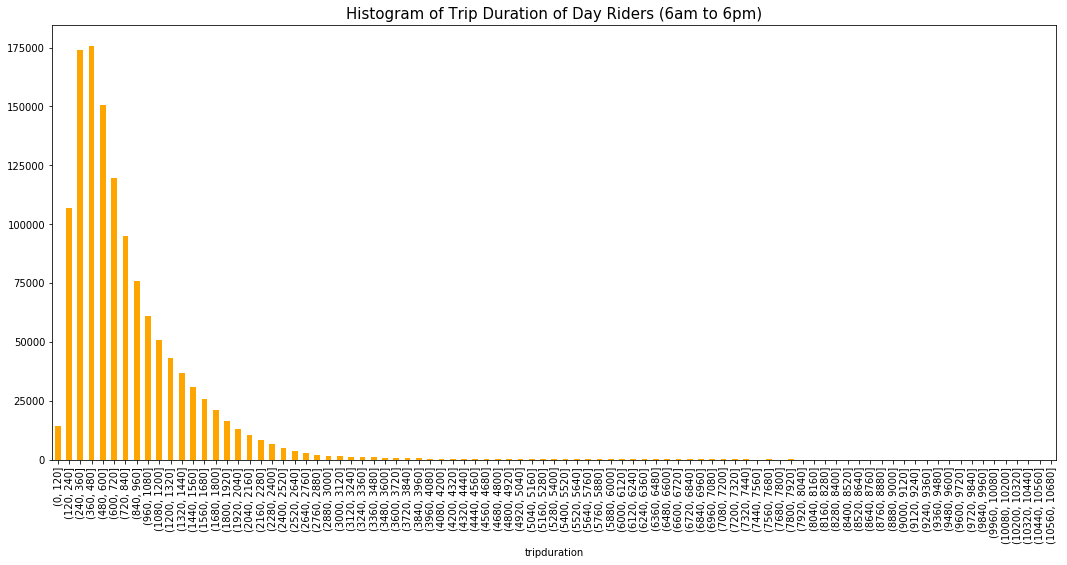

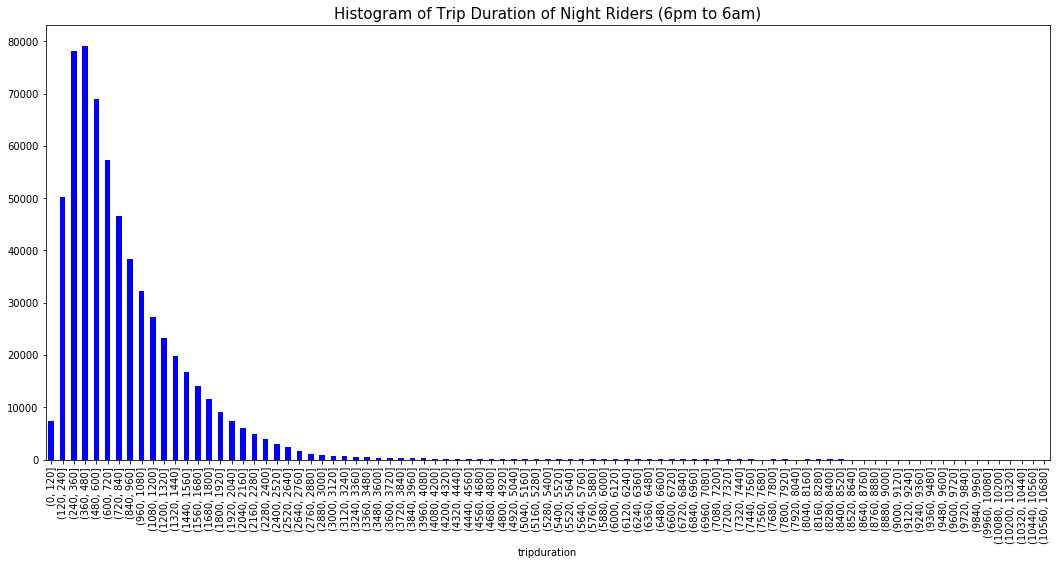

In [14]:
bins = np.arange(0, 10800, 120)

axDay = dayriders.tripduration.groupby(pd.cut(dayriders.tripduration, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False, figsize = (18,8), color = 'orange')
axDay.set_title("Histogram of Trip Duration of Day Riders (6am to 6pm)", fontsize = 15)


axNight = nightriders.tripduration.groupby(pd.cut(nightriders.tripduration, bins)).agg([count_nonzero]).plot(kind='bar',
                                                                legend=False, figsize = (18,8), color = 'blue')
axNight.set_title("Histogram of Trip Duration of Night Riders (6pm to 6am)", fontsize = 15);


**Figure 3: Histogrammed distribution of riders' trip duration by time of day **

Both histograms look similar in their distribution but we have to do further testing to find out.

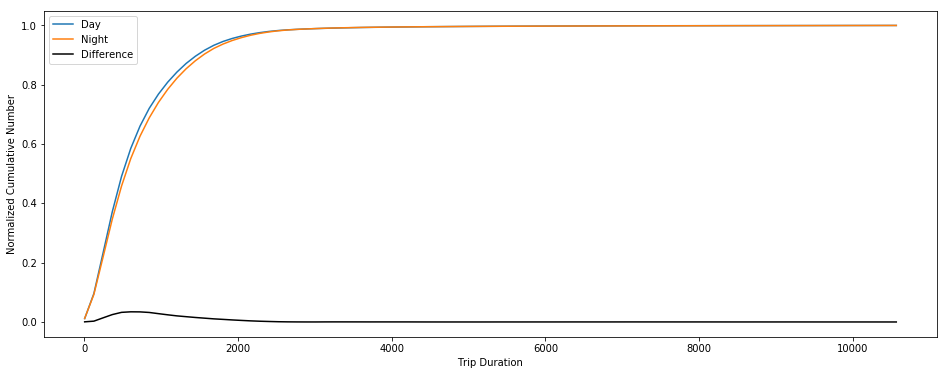

In [15]:
csD = dayriders.tripduration.groupby(pd.cut(dayriders['tripduration'], bins)).agg([count_nonzero]).cumsum()

csN = nightriders.tripduration.groupby(pd.cut(nightriders['tripduration'], bins)).agg([count_nonzero]).cumsum()

pl.figure(figsize=(16,6))
pl.plot(bins[:-1] + 5, csD / csD.max(), label = "Day")
pl.plot(bins[:-1] + 5, csN / csN.max(), label = "Night")
pl.plot(bins[:-1] + 5, np.abs(csD / csD.max()-csN / csN.max()), 'k', label = "Difference")
pl.xlabel("Trip Duration")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

** Figure 4: The cumulative distribution of CitiBike riders' trip duration by time of day**


They look similar! But the difference gets to 10%. If I wanted to code the KS test by hand I woud have everything I need: the normalized cumulative distributions can be subtracted from each other and the max distance can calculated. 

Notice that there may be NaN values you are gonna have to deal with! 
You can do that for example with a Boolean statementsuch as  df.ageF[~np.isnan(df.ageF)] or you can use numpy functions that deal with Nan values: nansum, nanmean, nanstd...

# KS tests to compare 2 samples

$H_0$: The distribution of the two samples are the same, $\alpha = 0.5$.

In [55]:
ks_dn = scipy.stats.ks_2samp(nightriders.tripduration, dayriders.tripduration)
print (ks_dn)

Ks_2sampResult(statistic=0.035123365813344187, pvalue=0.0)


In [17]:
n = nightriders.tripduration.size
m = dayriders.tripduration.size
1.36*np.sqrt((n+m)/(n*m))

0.0021064293812138972

The KS-Statistic is 0.03512 and is larger than 0.00211. The p-value is also less than 0.05, so we can reject the null hypothesis that the two samples have the same distribution at a significance level of 0.05.

In [18]:
# for sample size that is 200 times smaller

dayriders_sample = dayriders.sample(frac=0.005, random_state=13)
nightriders_sample = nightriders.sample(frac=0.005, random_state=13)

ks_sample = scipy.stats.ks_2samp(dayriders_sample.tripduration, nightriders_sample.tripduration)
print(ks_sample)

Ks_2sampResult(statistic=0.047853885804916785, pvalue=0.0001358652476690446)


In [19]:
n = nightriders_sample.tripduration.size
m = dayriders_sample.tripduration.size
1.36 * np.sqrt((n+m)/(n*m))

0.02978971904094993

For this smaller sample, the KS-Statistic is 0.04785 and is larger than 0.02979. The p-value is also less than 0.05, so we can reject the null hypothesis that the two smaller samples have the same distribution at a significance level of 0.05.

# Now retest using a test for correlation. 

That will answer a slightly different question though - formulate the NULL appropriately. The tests for correlations (generally) requires the variable to be paired, so that I can tell if x changes does y change similarly. But the datasets are of different size! You will need to reduce them to the same size. You can do that by subsampling of the data: take only 1 ride every of 200, which you can achieve "slicing and broadcasting" the array or using one of the python function (built in python numpy.random.choice() functions for example: Docstring:
choice(a, size=None, replace=True, p=None)

Generates a random sample from a given 1-D array

        .. versionadded:: 1.7.0

Parameters
...

But make sure you understand how to use it! there is an option "replace" which you should think about.

# Pearson's  test for correlation

In [20]:
# group by start station id

dayridersmean = pd.DataFrame(dayriders.groupby(['start station id'])['tripduration'].mean())
dayridersmean.rename(columns={"tripduration": "dayavetripduration"}, inplace = True)

nightridersmean = pd.DataFrame(nightriders.groupby(['start station id'])['tripduration'].mean())
nightridersmean.rename(columns={"tripduration": "nightavetripduration"}, inplace = True)

In [21]:
dayridersmean.head()

,dayavetripduration
start station id,
72,1143.526900
79,1101.020743
82,909.209516
83,1134.597426
116,657.599317


In [22]:
nightridersmean.head()

,nightavetripduration
start station id,
72,1233.248933
79,924.425271
82,1272.335740
83,943.269324
116,721.334237


In [23]:
# merge dataframes
avetripduration = pd.concat([dayridersmean, nightridersmean], axis=1, join='inner')
avetripduration.head()

,dayavetripduration,nightavetripduration
start station id,,
72,1143.526900,1233.248933
79,1101.020743,924.425271
82,909.209516,1272.335740
83,1134.597426,943.269324
116,657.599317,721.334237


In [24]:
scipy.stats.pearsonr(avetripduration.dayavetripduration, avetripduration.nightavetripduration)

(0.41264227483747518, 9.8619093142765161e-22)

The Pearson correlation coefficient is 0.41264, indicating that there is a positive correlation between average trip duration in the day and in the night, starting from the same station. The p-value is very small, indicating that the Pearson correlation coefficient calculated is reliable.

# Spearman's  test for correlation

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html#scipy.stats.spearmanr

$H_0$: There is no correlation between average trip duration in the day and in the night, starting form the same station, $\alpha = 0.5$.

In [25]:
scipy.stats.spearmanr(avetripduration.dayavetripduration, avetripduration.nightavetripduration)

SpearmanrResult(correlation=0.47125292059636031, pvalue=1.120841938925331e-28)

The Spearman correlation coefficient is 0.47126, indicating that there is a positive correlation between average trip duration in the day and in the night, starting from the same station. The p-value is very small, much smaller than 0.05, so we can reject the null hypothesis that the two data sets are uncorrelated.

# Extra Credit

**Derivation of coordinates**:

A rectangle was mapped out for both Brooklyn and Manhattan to estimate the location of  bike stations, using the following coordinates from Google Maps:
- Coney Island (**40.570066**, -73.975745)
- Shore Road Park and Parkway (40.612360, **-74.036647**)
- Manhattan Bridge (**40.698649**, -74.000551)
- The Bushwick Collective (40.692185, **-73.924627**)
- Pier 62 @ Hudson River Park (40.751702, **-74.006837**)
- Inwood Hill Park (**40.861564**, -73.940727)
- Carl Schurz Park (40.770898, **-73.962114**)

Bolded coordinates were used to mark out the boundaries below.

In [71]:
brooklynriders = pd.DataFrame(df[['end station id', 'birth year']][(df['start station latitude'] >= 40.570066) 
                                                                    & (df['start station latitude'] < 40.698649)
                                                                    & (df['start station longitude'] >= -74.036647)
                                                                    & (df['start station longitude'] <= -73.924627)])

manhattanriders = pd.DataFrame(df[['end station id', 'birth year']][(df['start station latitude'] >= 40.698649) 
                                                                    & (df['start station latitude'] <= 40.861564)
                                                                    & (df['start station longitude'] >= -74.006837)
                                                                    & (df['start station longitude'] <= -73.992114)])

In [74]:
brooklynriders['birth year'] = 2016 - brooklynriders['birth year']
brooklynriders.rename(columns={'birth year': 'age_b'}, inplace = True)

In [75]:
manhattanriders['birth year'] = 2016 - manhattanriders['birth year']
manhattanriders.rename(columns={'birth year': 'age_m'}, inplace = True)

In [92]:
# dropping NaN values
manhattanriders.dropna(inplace= True)
brooklynriders.dropna(inplace= True)

# KS tests to compare 2 samples

$H_0$: The distribution of the two samples are the same, $\alpha = 0.5$.

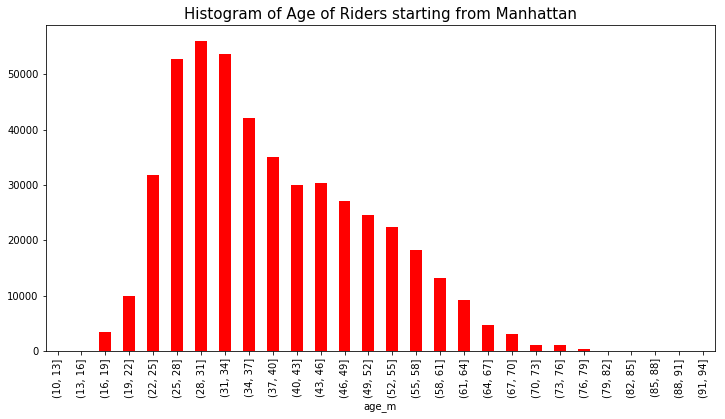

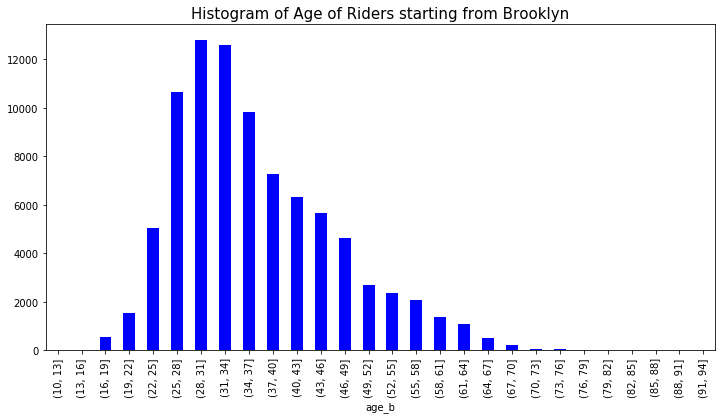

In [77]:
bins = np.arange(10, 95, 3)

axM = manhattanriders.age_m.groupby(pd.cut(manhattanriders.age_m, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False, figsize = (12,6), color = 'red')
axM.set_title("Histogram of Age of Riders starting from Manhattan", fontsize = 15)


axB = brooklynriders.age_b.groupby(pd.cut(brooklynriders.age_b, bins)).agg([count_nonzero]).plot(kind='bar',
                                                                legend=False, figsize = (12,6), color = 'blue')
axB.set_title("Histogram of Age of Riders starting from Brooklyn", fontsize = 15);


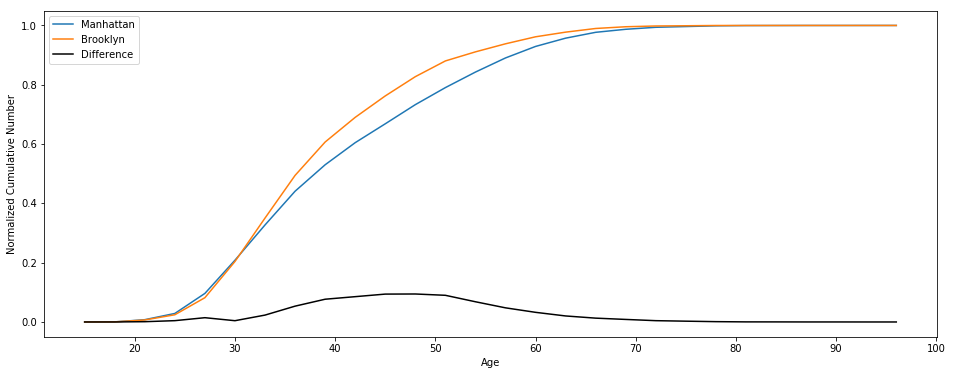

In [78]:
csM = manhattanriders.age_m.groupby(pd.cut(manhattanriders['age_m'], bins)).agg([count_nonzero]).cumsum()

csB = brooklynriders.age_b.groupby(pd.cut(brooklynriders['age_b'], bins)).agg([count_nonzero]).cumsum()

pl.figure(figsize=(16,6))
pl.plot(bins[:-1] + 5, csM / csM.max(), label = "Manhattan")
pl.plot(bins[:-1] + 5, csB / csB.max(), label = "Brooklyn")
pl.plot(bins[:-1] + 5, np.abs(csM / csM.max()-csB / csB.max()), 'k', label = "Difference")
pl.xlabel("Age")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

In [79]:
ks_age = scipy.stats.ks_2samp(manhattanriders.age_m, brooklynriders.age_b)
print (ks_age)

Ks_2sampResult(statistic=0.094285585135546746, pvalue=0.0)


In [80]:
n = manhattanriders.age_m.size
m = brooklynriders.age_b.size
1.36 * np.sqrt((n+m)/(n*m))

0.0050070299525048221

The KS-Statistic is 0.09429 and is larger than 0.00501. The p-value is also less than 0.05, so we can reject the null hypothesis that the two samples have the same distribution at a significance level of 0.05.

In [82]:
# for sample size that is 200 times smaller

manhattanriders_sample = manhattanriders.sample(frac=0.005, random_state=13)
brooklynriders_sample = brooklynriders.sample(frac=0.005, random_state=13)

ks_age_sample = scipy.stats.ks_2samp(manhattanriders_sample.age_m, brooklynriders_sample.age_b)
print(ks_age_sample)

Ks_2sampResult(statistic=0.11140842991068134, pvalue=0.00018824982790129581)


In [83]:
n = manhattanriders_sample.age_m.size
m = brooklynriders_sample.age_b.size
1.36 * np.sqrt((n+m)/(n*m))

0.070834692784867981

The KS-Statistic is 0.11141 and is larger than 0.07083. The p-value is also less than 0.05, so we can reject the null hypothesis that the two samples have the same distribution at a significance level of 0.05.

# Pearson's  Test for Correlation

## Hypothesis?

In [84]:
# group by end station id

manhattanridersmean = pd.DataFrame(manhattanriders.groupby(['end station id'])['age_m'].mean())
manhattanridersmean.rename(columns={"age_m": "ave_age_m"}, inplace = True)

brooklynridersmean = pd.DataFrame(brooklynriders.groupby(['end station id'])['age_b'].mean())
brooklynridersmean.rename(columns={"age_b": "ave_age_b"}, inplace = True)

In [91]:
# merge dataframes
ave_age = pd.concat([manhattanridersmean, brooklynridersmean], axis=1, join='inner')
ave_age.head()

,ave_age_m,ave_age_b
end station id,,
72,38.918175,34.200000
79,39.841971,41.600000
82,41.868778,42.457143
83,36.443662,35.827313
116,38.399798,35.625000


In [87]:
scipy.stats.pearsonr(ave_age.ave_age_m, ave_age.ave_age_b)

(0.24731163364055703, 4.894381000953598e-08)

The Pearson correlation coefficient is 0.24731, indicating that there is a weak positive correlation between the average age of riders that end at the same station but start from different boroughs. The p-value is very small, indicating that the Pearson correlation coefficient calculated is reliable.

# Spearman's  Test for Correlation

$H_0$: There is no correlation between the average age of riders that start from different boroughs but end at the same station, $\alpha = 0.5$.

In [93]:
scipy.stats.spearmanr(ave_age.ave_age_m, ave_age.ave_age_b)

SpearmanrResult(correlation=0.38644821916405564, pvalue=2.4815722676354797e-18)

The Spearman correlatin coefficient is 0.38645, indicating that there is a positive correlation between the average age of riders that end at the same station but start from different boroughs. The p-value is very small, much smaller than 0.05, so we can reject the null hypothesis that the two data sets are uncorrelated.